Guide image processing with opencv and python by Devision789

Install opencv package, matplotlib

In [1]:
!pip install opencv-python


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


import lib

In [7]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

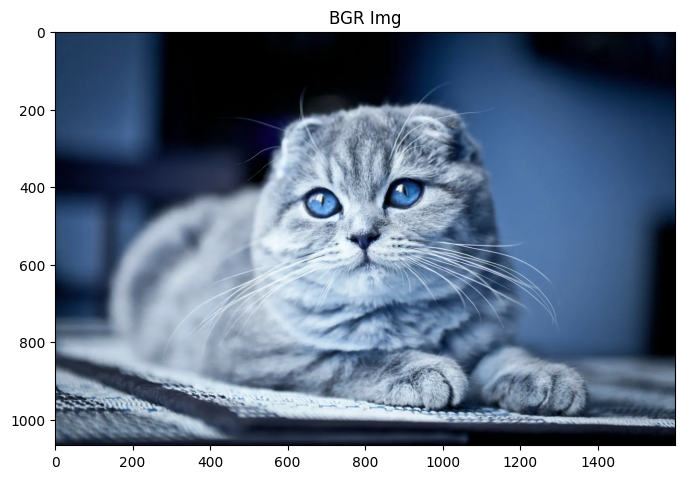

In [31]:
img = cv2.imread("1.png")
plt.figure(figsize=(8,8)) # kich thuoc hien thi
plt.imshow(img) # hien thi bien mong muon
plt.title('BGR Img') # dat tieu de anh
plt.show() # show


Properties of an Image

In [23]:
Shape=img.shape
print(Shape)
h, w, c = Shape
print("Height:", h, "Width:", w, "Channels:", c)

(1067, 1600, 3)
Height: 1067 Width: 1600 Channels: 3


Type Image

In [24]:
print(type(img)) # type
print(img.dtype) # data type image
print(img) # pixel

<class 'numpy.ndarray'>
uint8
[[[91 57 30]
  [91 57 30]
  [91 57 30]
  ...
  [13  0  0]
  [13  0  0]
  [13  0  0]]

 [[91 57 30]
  [91 57 30]
  [91 57 30]
  ...
  [13  0  0]
  [13  0  0]
  [13  0  0]]

 [[91 57 30]
  [91 57 30]
  [91 57 30]
  ...
  [13  0  0]
  [13  0  0]
  [13  0  0]]

 ...

 [[44 27 21]
  [44 27 21]
  [44 27 21]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[42 25 19]
  [42 25 19]
  [42 25 19]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[36 21 14]
  [36 21 14]
  [36 21 14]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


In [34]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # BGR SANG GRAY
rgb  = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # BGR SANG RGB
hsv  = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) # BGR SANG HSV
lab  = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) # BGE SANG LAB



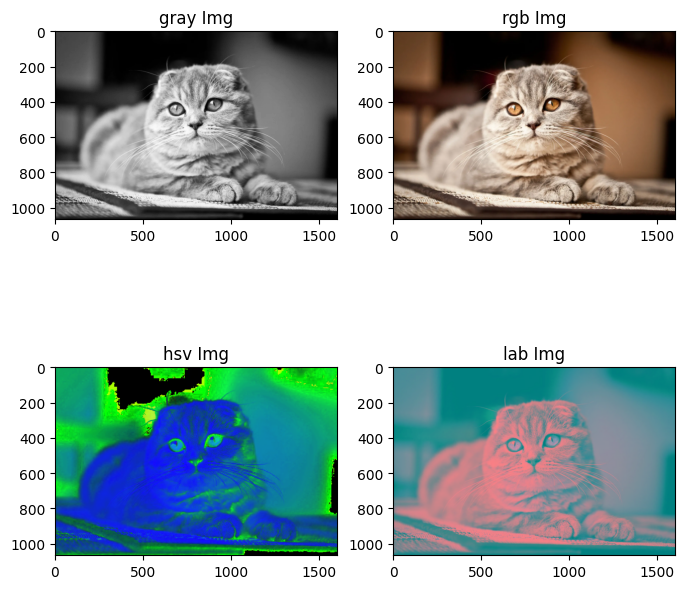

In [77]:
plt.figure(figsize=(8,8)) # kich thuoc hien thi
plt.subplot(221)
plt.imshow(gray,'gray') # hien thi bien mong muon
plt.title('gray Img') # dat tieu de anh
plt.savefig('gray.png', format='png')
plt.subplot(222)
plt.imshow(rgb) # hien thi bien mong muon
plt.title('rgb Img') # dat tieu de anh
plt.savefig('rgb.png', format='png')
plt.subplot(223)
plt.imshow(hsv) # hien thi bien mong muon
plt.title('hsv Img') # dat tieu de anh
plt.savefig('hsv.png', format='png')
plt.subplot(224)
plt.imshow(lab) # hien thi bien mong muon
plt.title('lab Img') # dat tieu de anh
plt.savefig('lab.png', format='png')
plt.show() # show

Chúng ta có thể thử tạo ra một hình ảnh tổng hợp chứa bốn hình vuông đồng tâm với bốn giá trị cường độ điểm ảnh khác nhau

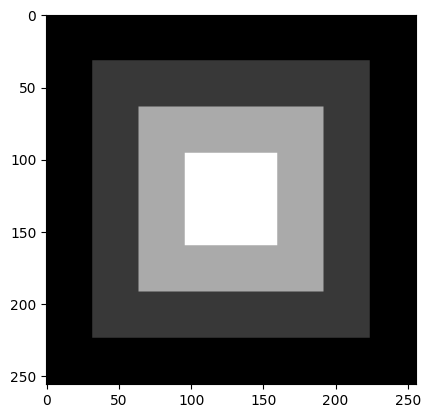

In [78]:
import numpy as np
con_img = np.zeros([256, 256])
con_img[0:32, :] = 40 # upper row
con_img[:, :32] = 40 #left column
con_img[:, 224:256] = 40 # right column
con_img[224:, :] = 40 # lower row
con_img[32:64, 32:224] = 80 # upper row
con_img[64:224, 32:64] = 80 # left column
con_img[64:224, 192:224] = 80 # right column
con_img[192:224, 32:224] = 80 # lower row
con_img[64:96, 64:192] = 160 # upper row
con_img[96:192, 64:96] = 160 # left column
con_img[96:192, 160:192] = 160 # right column
con_img[160:192, 64:192] = 160 # lower row
con_img[96:160, 96:160] = 220
plt.imshow(con_img, 'gray')

Trích xuất các mặt phẳng bit hình ảnh và tái tạo 

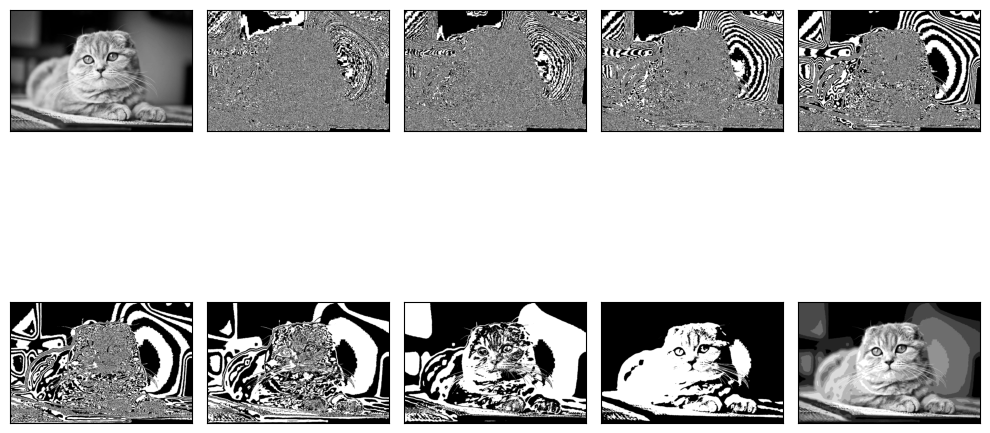

In [44]:
def extract_bit_plane(cd):
    #  extracting all bit one by one 
    # from 1st to 8th in variable 
    # from c1 to c8 respectively 
    c1 = np.mod(cd, 2)
    c2 = np.mod(np.floor(cd/2), 2)
    c3 = np.mod(np.floor(cd/4), 2)
    c4 = np.mod(np.floor(cd/8), 2)
    c5 = np.mod(np.floor(cd/16), 2)
    c6 = np.mod(np.floor(cd/32), 2)
    c7 = np.mod(np.floor(cd/64), 2)
    c8 = np.mod(np.floor(cd/128), 2)
    # combining image again to form equivalent to original grayscale image 
    cc = 2 * (2 * (2 * c8 + c7) + c6) # reconstructing image  with 3 most significant bit planes
    to_plot = [cd, c1, c2, c3, c4, c5, c6, c7, c8, cc]
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(10, 8), subplot_kw={'xticks': [], 'yticks': []})
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for ax, i in zip(axes.flat, to_plot):
        ax.imshow(i, cmap='gray')
    plt.tight_layout()
    plt.show()
    return cc

reconstructed_image = extract_bit_plane(gray)

CAC BUOC CO BAN XU LY ANH

DIEU CHINH KICH THUOC

In [47]:
image = cv2.imread('1.png') # doc anh
new_width = 300 
new_height = 300
new_size = (new_width, new_height) # thiet lap kich thuoc moi


In [48]:
# thay doi kich thuoc bang noi suy
resized_nearest = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)
resized_linear = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
resized_area = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
resized_cubic = cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC)
resized_lanczos4 = cv2.resize(image, new_size, interpolation=cv2.INTER_LANCZOS4)


In [49]:
# chuyen tu BGR SANG RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resized_nearest_rgb = cv2.cvtColor(resized_nearest, cv2.COLOR_BGR2RGB)
resized_linear_rgb = cv2.cvtColor(resized_linear, cv2.COLOR_BGR2RGB)
resized_area_rgb = cv2.cvtColor(resized_area, cv2.COLOR_BGR2RGB)
resized_cubic_rgb = cv2.cvtColor(resized_cubic, cv2.COLOR_BGR2RGB)
resized_lanczos4_rgb = cv2.cvtColor(resized_lanczos4, cv2.COLOR_BGR2RGB)


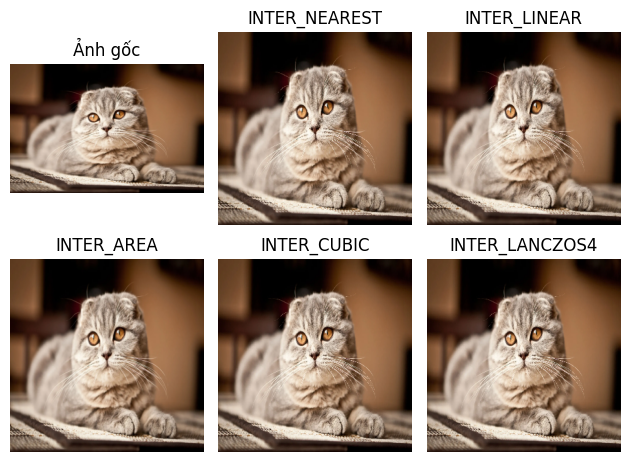

In [50]:
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(resized_nearest_rgb)
plt.title('INTER_NEAREST')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(resized_linear_rgb)
plt.title('INTER_LINEAR')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(resized_area_rgb)
plt.title('INTER_AREA')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(resized_cubic_rgb)
plt.title('INTER_CUBIC')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(resized_lanczos4_rgb)
plt.title('INTER_LANCZOS4')
plt.axis('off')

plt.tight_layout()
plt.show()


(-0.5, 1599.5, 1066.5, -0.5)

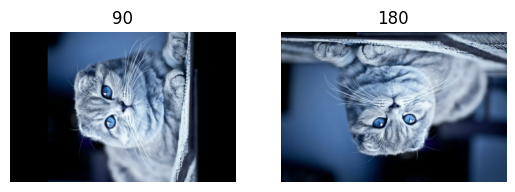

In [55]:
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
M1 = cv2.getRotationMatrix2D((cols/2,rows/2),180,1) 
DST = cv2.warpAffine(image,M1,(cols,rows)) 
plt.subplot(2, 2, 1)
plt.imshow(dst)
plt.title('90')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(DST)
plt.title('180')
plt.axis('off')

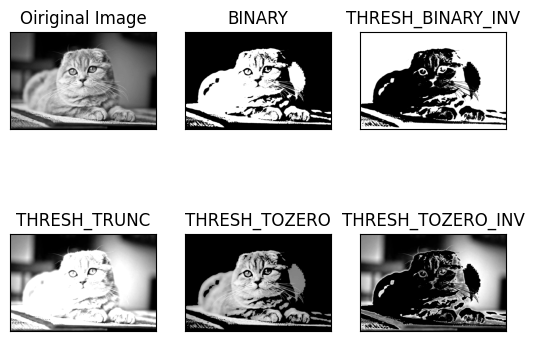

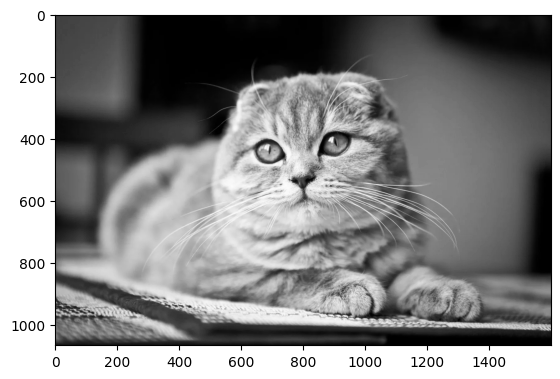

In [76]:
gray_image=cv2.imread('1.png',0)
ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()
plt.imshow(gray_image,'gray')
plt.show()

NGUONG THICH UNG

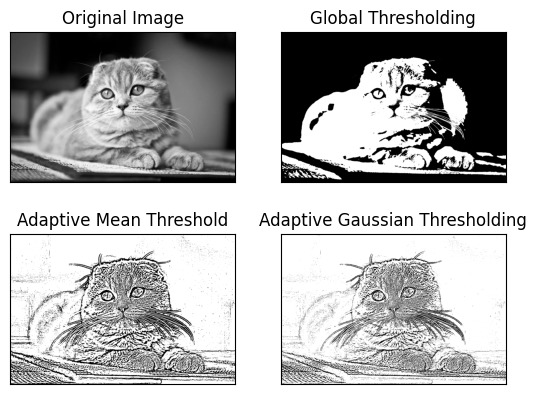

In [80]:

ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)

thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

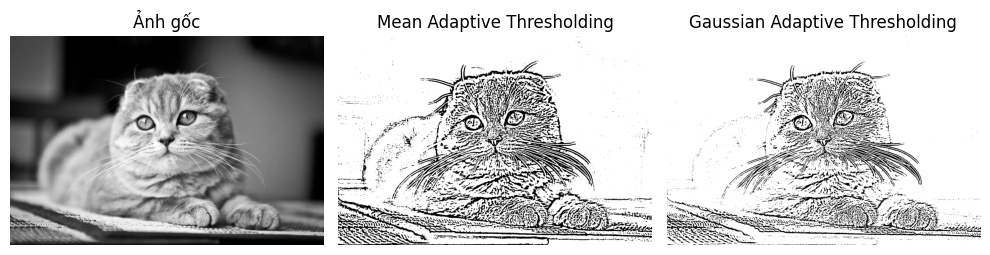

In [81]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển đổi sang grayscale
image_path = '1.png'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Áp dụng GaussianBlur để làm mờ ảnh, giảm nhiễu
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Ngưỡng thích ứng với Mean Adaptive Thresholding
thresh_mean = cv2.adaptiveThreshold(
    blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)

# Ngưỡng thích ứng với Gaussian Adaptive Thresholding
thresh_gaussian = cv2.adaptiveThreshold(
    blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Hiển thị kết quả
plt.figure(figsize=(10, 7))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresh_mean, cmap='gray')
plt.title('Mean Adaptive Thresholding')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(thresh_gaussian, cmap='gray')
plt.title('Gaussian Adaptive Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()


phat hien canh

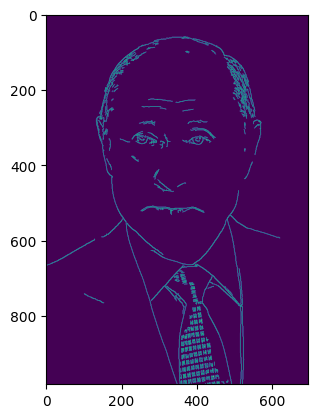

In [94]:
image = cv2.imread('3.png')

#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges)


LOC ANH

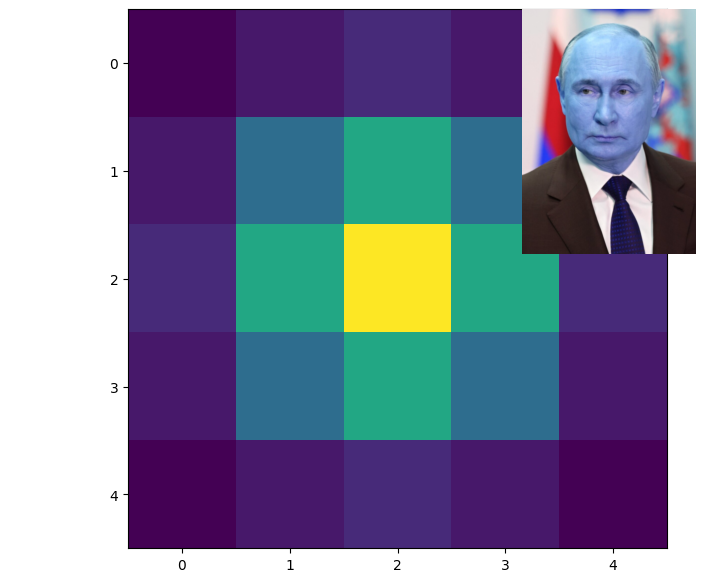

In [103]:
image = cv2.imread('3.png')

averaging_kernel = np.ones((3,3),np.float32)/9 
filtered_image = cv2.filter2D(image,-1,kernel) 

#get a one dimensional Gaussian Kernel 
gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
#converting to two dimensional kernel using matrix multiplication 
gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
#you can also use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 
filtered_image = cv2.filter2D(image,-1,gaussian_kernel) 
plt.figure(figsize=(10, 7))
plt.imshow(gaussian_kernel  )
plt.subplot(2, 2, 1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(filtered_image )
plt.axis('off')
plt.show()

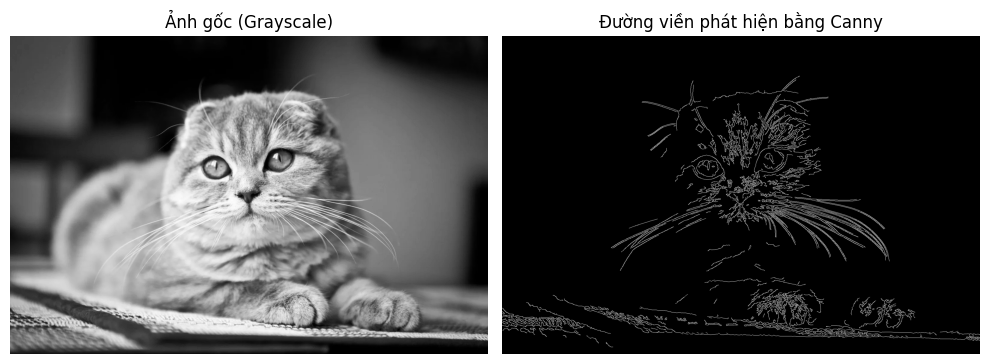

In [107]:

# Đọc ảnh và chuyển đổi sang grayscale
image_path = '1.png'  
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Áp dụng GaussianBlur để làm mờ ảnh, giảm nhiễu
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Phát hiện đường viền sử dụng Canny
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blurred_image, low_threshold, high_threshold)

# Hiển thị kết quả
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Ảnh gốc (Grayscale)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Đường viền phát hiện bằng Canny')
plt.axis('off')

plt.tight_layout()
plt.show()


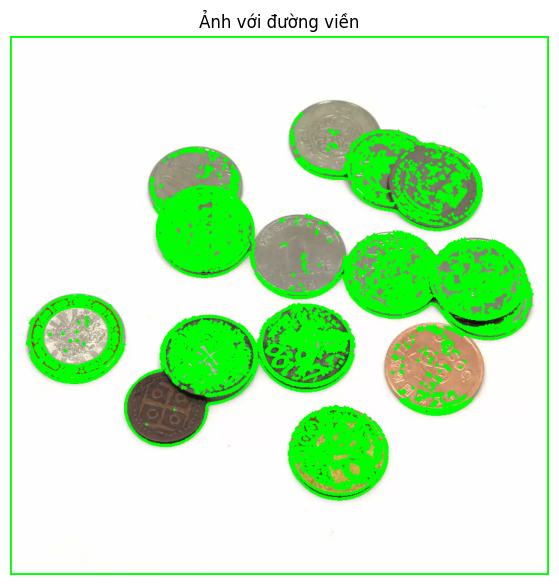

In [110]:


# Đọc ảnh
image_path = '4.png'  
image = cv2.imread(image_path)
original_image = image.copy()  # Sao lưu ảnh gốc để vẽ đường viền

# Chuyển đổi sang ảnh grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# Áp dụng ngưỡng để có được ảnh nhị phân
ret, thresh = cv2.threshold(gray_image, 127, 255, 0)

# Tìm các đường viền trong ảnh nhị phân
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Vẽ các đường viền lên ảnh gốc
with_contours = cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

# Hiển thị ảnh với các đường viền đã vẽ
plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(with_contours, cv2.COLOR_BGR2RGB))
plt.title('Ảnh với đường viền')
plt.axis('off')
plt.show()


KEYPOINTS

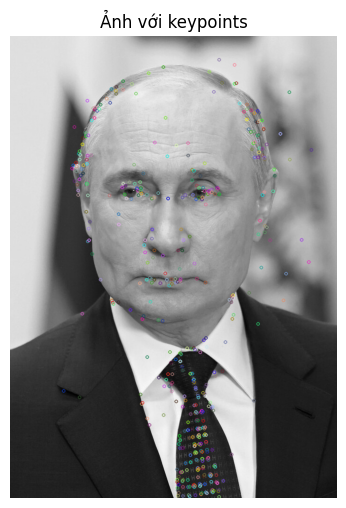

In [113]:

# Đọc ảnh
image_path = '3.png'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Tạo đối tượng SIFT
sift = cv2.SIFT_create()

# Tính toán keypoints và descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Vẽ các keypoints lên ảnh grayscale
with_keypoints = cv2.drawKeypoints(gray, keypoints, None)

# Hiển thị ảnh
plt.figure(figsize=(8, 6))
plt.imshow(with_keypoints)
plt.title('Ảnh với keypoints')
plt.axis('off')
plt.show()
